In [1]:
# General
import os
import gc
import json
from dotenv import load_dotenv
from datetime import datetime, timedelta

# Data manipulation and processing
import pandas as pd
import numpy as np
import polars as pl
import psycopg2
from sqlalchemy import create_engine
from pandas.plotting import scatter_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style, init

# Machine Learning & Modeling
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import torch
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Others
import shap
import statsmodels.api as sm


c:\Users\samema\OneDrive\LV_Data\.venv\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 13.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(seed=42)

In [3]:
import os
print("Current Working Directory:", os.getcwd())
os.chdir('c:\\Users\\samema\\DB\\LV_Data2\\')
print("New Working Directory:", os.getcwd())



Current Working Directory: c:\Users\samema\DB\LV_Data2\project_root\modeling
New Working Directory: c:\Users\samema\DB\LV_Data2


In [4]:
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

# Load environment variables
if load_dotenv('se_env.txt'):
    print("Environment variables loaded successfully.")
else:
    print("Failed to load environment variables from 'se.env.txt'.")

# Database connection parameters
DATABASE_NAME = os.getenv('DB_NAME')
DATABASE_USER = os.getenv('DB_USER')
DATABASE_PASSWORD = os.getenv('DB_PASS')
DATABASE_HOST = os.getenv('DB_HOST')
DATABASE_PORT = os.getenv('DB_PORT')

# Print database connection details
print(f"Database: {DATABASE_NAME}, User: {DATABASE_USER}, Password: {bool(DATABASE_PASSWORD)}")

# Try creating a database connection
try:
    db_params = {
        'dbname': DATABASE_NAME,
        'user': DATABASE_USER,
        'password': DATABASE_PASSWORD,
        'host': DATABASE_HOST,
        'port': DATABASE_PORT
    }
    conn = psycopg2.connect(**db_params)
    print("Database connection established.")
except Exception as e:
    print(f"Failed to connect to the database: {e}")

# Create an SQLAlchemy engine
try:
    engine = create_engine(f"postgresql+psycopg2://{DATABASE_USER}:{DATABASE_PASSWORD}@{DATABASE_HOST}:{DATABASE_PORT}/{DATABASE_NAME}")
    print("SQLAlchemy engine created.")
except Exception as e:
    print(f"Failed to create SQLAlchemy engine: {e}")

# List of table names
table_names = [
    'customer_analysis_se.combined_bets_features_aggregated',
    'customer_analysis_se.combined_bets_features_aggregated_30d',
    'customer_analysis_se.combined_bets_features_aggregated_60d',
    'customer_analysis_se.combined_bets_features_aggregated_90d',
    'customer_analysis_se.combined_sessions_features_aggregated',
    'customer_analysis_se.combined_sessions_features_aggregated_30d',
    'customer_analysis_se.combined_sessions_features_aggregated_60d',
    'customer_analysis_se.combined_sessions_features_aggregated_90d',
    'customer_analysis_se.combined_loss_chasing_features_aggregated',
    'customer_analysis_se.combined_loss_chasing_features_aggregated_30d',
    'customer_analysis_se.combined_loss_chasing_features_aggregated_60d',
    'customer_analysis_se.combined_loss_chasing_features_aggregated_90d',
    'customer_analysis_se.combined_payments_features_aggregated',
    'customer_analysis_se.combined_payments_features_aggregated_30d',
    'customer_analysis_se.combined_payments_features_aggregated_60d',
    'customer_analysis_se.combined_payments_features_aggregated_90d',
    'customer_analysis_se.manual_assessments_train',
    'customer_analysis_se.combined_rg_prediction_train',
    'customer_analysis_se.combined_rg_actions_train',
    'customer_analysis_se.combined_rg_actions_train_30d',
    'customer_analysis_se.combined_rg_actions_train_60d',
    'customer_analysis_se.combined_rg_actions_train_90d',
    'customer_analysis_se.daily_customer_aggregates_train',
    'customer_analysis_se.daily_customer_aggregates_train_30d',
    'customer_analysis_se.daily_customer_aggregates_train_60d',
    'customer_analysis_se.daily_customer_aggregates_train_90d',
    'customer_analysis_se.daily_customer_aggregates_test',
    'customer_analysis_se.swedish_customer_background',
    'customer_analysis_se.combined_bets_test_features_aggregated_use',
    'customer_analysis_se.combined_sessions_test_features_aggregated',
    'customer_analysis_se.combined_loss_chasing_test_features_aggregated',
    'customer_analysis_se.combined_payments_test_features_aggregated',
    'customer_analysis_se.manual_assessments_test',
    'customer_analysis_se.combined_rg_actions_test',
    'customer_analysis_se.combined_rg_prediction_test',
]

# Dictionary to hold DataFrames for each table
dfs = {}

# Load data into DataFrames
for table_name in table_names:
    print(f"Loading data from table: {table_name}")
    try:
        sql = f"SELECT * FROM {table_name}"
        dfs[table_name] = pd.read_sql_query(sql, engine)
        print(f"Loaded {len(dfs[table_name])} rows from {table_name}")
    except Exception as e:
        print(f"Failed to load data from {table_name}: {e}")


Environment variables loaded successfully.
Database: LeoVegas_Final_2024, User: postgres, Password: True
Database connection established.
SQLAlchemy engine created.
Loading data from table: customer_analysis_se.combined_bets_features_aggregated
Loaded 10552 rows from customer_analysis_se.combined_bets_features_aggregated
Loading data from table: customer_analysis_se.combined_bets_features_aggregated_30d
Loaded 8662 rows from customer_analysis_se.combined_bets_features_aggregated_30d
Loading data from table: customer_analysis_se.combined_bets_features_aggregated_60d
Loaded 8078 rows from customer_analysis_se.combined_bets_features_aggregated_60d
Loading data from table: customer_analysis_se.combined_bets_features_aggregated_90d
Loaded 7638 rows from customer_analysis_se.combined_bets_features_aggregated_90d
Loading data from table: customer_analysis_se.combined_sessions_features_aggregated
Loaded 17007 rows from customer_analysis_se.combined_sessions_features_aggregated
Loading data fro

In [5]:
# Starting with the manual assessments as the base table
base_df = dfs['customer_analysis_se.manual_assessments_train']
base_df_test = dfs['customer_analysis_se.manual_assessments_test']

In [6]:
base_df

customer_id        date          category date_column
0        LVG_DW_MALTA_87500_player  2019-01-24          low_risk        None
1         LVG_DW_MALTA_1160_player  2019-10-07          low_risk        None
2         LVG_DW_MALTA_4740_player  2019-10-07          low_risk        None
3       LVG_DW_MALTA_112017_player  2019-10-07          low_risk        None
4         LVG_DW_MALTA_4004_player  2019-10-07          low_risk        None
...                            ...         ...               ...         ...
23412   LVG_DW_MALTA_170603_player  2021-11-12  medium_high_risk        None
23413  LVG_DW_MALTA_1778605_player  2021-11-12  medium_high_risk        None
23414    LVG_DW_MALTA_82577_player  2021-11-12  medium_high_risk        None
23415    LVG_DW_MALTA_45464_player  2021-11-12  medium_high_risk        None
23416   LVG_DW_MALTA_119292_player  2021-11-12  medium_high_risk        None

[23417 rows x 4 columns]

In [7]:
dfs['customer_analysis_se.combined_rg_prediction_train']

customer_id        date     score      category  \
0        EXN_DW_MALTA_103747_player  2022-04-26  0.711488   medium_risk   
1        EXN_DW_MALTA_103747_player  2022-05-05  0.781925   medium_risk   
2        EXN_DW_MALTA_103747_player  2022-04-27  0.753218   medium_risk   
3        EXN_DW_MALTA_103747_player  2022-04-19  0.717379   medium_risk   
4        EXN_DW_MALTA_103747_player  2022-04-20  0.791644   medium_risk   
...                             ...         ...       ...           ...   
6435010   RPL_DW_MALTA_35486_player  2021-07-03  0.328731  minimal_risk   
6435011   RPL_DW_MALTA_35486_player  2021-07-05  0.341629  minimal_risk   
6435012   RPL_DW_MALTA_35486_player  2021-09-19  0.217695  minimal_risk   
6435013   RPL_DW_MALTA_35486_player  2021-10-09  0.418351  minimal_risk   
6435014   RPL_DW_MALTA_35486_player  2021-02-19  0.273626  minimal_risk   

                                               explanation  label_date  
0        The score is • increased due to failed deposit...  2022-04-16  
1        The score is increased due to • failed deposit...  2022-04-16  
2        The score is • increased due to failed deposit...  2022-04-16  
3        The score is • increased due to failed deposit...  2022-04-16  
4        The score is • increased due to failed deposit...  2022-04-16  
...                                                    ...         ...  
6435010                                               None  2021-01-20  
6435011                                               None  2021-01-20  
6435012                                               None  2021-01-20  
6435013                                               None  2021-01-20  
6435014                                               None  2021-01-20  

[6435015 rows x 6 columns]

In [8]:
# Assuming base_df is your DataFrame where you want to replace 'unknown_risk'
# and dfs['customer_analysis_se.combined_rg_prediction_train'] is already loaded

# Step 1: Create a lookup dictionary from the customer_analysis DataFrame
lookup_df = dfs['customer_analysis_se.combined_rg_prediction_train'][['customer_id', 'date', 'category']]
category_lookup = lookup_df.set_index(['customer_id', 'date'])['category'].to_dict()

# Step 2: Create a mask for rows where category is 'unknown_risk' in base_df
mask_unknown_risk = base_df['category'] == 'unknown_risk'

# Step 3: Replace 'unknown_risk' in base_df using the lookup dictionary
# We create a list of tuples (customer_id, date) for the rows with 'unknown_risk'
keys_to_lookup = list(zip(base_df.loc[mask_unknown_risk, 'customer_id'], base_df.loc[mask_unknown_risk, 'date']))

# Step 4: Get replacement categories from the lookup dictionary
replacement_categories = [
    category_lookup.get(key, 'unknown_risk') for key in keys_to_lookup
]

# Step 5: Update the 'category' column in base_df with these replacement values
base_df.loc[mask_unknown_risk, 'category'] = replacement_categories

# Step 6: Verify the results
print("Final 'unknown_risk' counts after replacement in base_df:")
print(base_df['category'].value_counts())


Final 'unknown_risk' counts after replacement in base_df:
category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_medium_risk      644
Name: count, dtype: int64


In [9]:
base_df_30d = pd.merge(base_df, dfs['customer_analysis_se.combined_bets_features_aggregated_30d'], on=['customer_id','date'], how='left')
base_df_60d = pd.merge(base_df, dfs['customer_analysis_se.combined_bets_features_aggregated_60d'], on=['customer_id','date'], how='left')
base_df_90d =pd.merge(base_df, dfs['customer_analysis_se.combined_bets_features_aggregated_90d'], on=['customer_id','date'], how='left')
base_df = pd.merge(base_df, dfs['customer_analysis_se.combined_bets_features_aggregated'], on=['customer_id','date'], how='left')
base_df_test = pd.merge(base_df_test, dfs['customer_analysis_se.combined_bets_test_features_aggregated_use'], on=['customer_id','date'], how='left')

print("Merged with bets features")

Merged with bets features


In [10]:
df_sessions_30d = dfs['customer_analysis_se.combined_sessions_features_aggregated_30d'].copy()
df_sessions_30d.rename(columns={'label_date': 'date'}, inplace=True)

df_sessions_60d = dfs['customer_analysis_se.combined_sessions_features_aggregated_60d'].copy()
df_sessions_60d.rename(columns={'label_date': 'date'}, inplace=True)

df_sessions_90d = dfs['customer_analysis_se.combined_sessions_features_aggregated_90d'].copy()
df_sessions_90d.rename(columns={'label_date': 'date'}, inplace=True)


In [11]:
df_sessions = dfs['customer_analysis_se.combined_sessions_features_aggregated'].copy()
df_sessions.rename(columns={'label_date': 'date'}, inplace=True)
df_sessions_test = dfs['customer_analysis_se.combined_sessions_test_features_aggregated'].copy()
df_sessions_test.rename(columns={'label_date': 'date'}, inplace=True)


base_df = pd.merge(base_df, df_sessions, on=['customer_id','date'], how='left')
base_df_test = pd.merge(base_df_test, df_sessions_test, on=['customer_id','date'], how='left')

print("Merged with session features")

Merged with session features


In [12]:
base_df_30d = pd.merge(base_df_30d, df_sessions_30d, on=['customer_id', 'date'], how='left')
base_df_60d = pd.merge(base_df_60d, df_sessions_60d, on=['customer_id', 'date'], how='left')
base_df_90d = pd.merge(base_df_90d, df_sessions_90d, on=['customer_id', 'date'], how='left')
print("Merged 30-day, 60-day, and 90-day session features into base dataframes.")


Merged 30-day, 60-day, and 90-day session features into base dataframes.


In [13]:
df_loss_chasing_30d = dfs['customer_analysis_se.combined_loss_chasing_features_aggregated_30d'].copy()
df_loss_chasing_30d.rename(columns={'label_date': 'date'}, inplace=True)

df_loss_chasing_60d = dfs['customer_analysis_se.combined_loss_chasing_features_aggregated_60d'].copy()
df_loss_chasing_60d.rename(columns={'label_date': 'date'}, inplace=True)

df_loss_chasing_90d = dfs['customer_analysis_se.combined_loss_chasing_features_aggregated_90d'].copy()
df_loss_chasing_90d.rename(columns={'label_date': 'date'}, inplace=True)


In [14]:
df_loss_chasing = dfs['customer_analysis_se.combined_loss_chasing_features_aggregated'].copy()
df_loss_chasing.rename(columns={'label_date': 'date'}, inplace=True)
df_loss_chasing_test = dfs['customer_analysis_se.combined_loss_chasing_test_features_aggregated'].copy()
df_loss_chasing_test.rename(columns={'label_date': 'date'}, inplace=True)

base_df = pd.merge(base_df, df_loss_chasing, on=['customer_id','date'], how='left')
base_df_test = pd.merge(base_df_test, df_loss_chasing_test, on=['customer_id','date'], how='left')

print("Merged with loss_chasing features")

Merged with loss_chasing features


In [15]:
base_df_30d = pd.merge(base_df_30d, df_loss_chasing_30d, on=['customer_id', 'date'], how='left')
base_df_60d = pd.merge(base_df_60d, df_loss_chasing_60d, on=['customer_id', 'date'], how='left')
base_df_90d = pd.merge(base_df_90d, df_loss_chasing_90d, on=['customer_id', 'date'], how='left')
print("Merged 30-day, 60-day, and 90-day loss chasing features into base dataframes.")


Merged 30-day, 60-day, and 90-day loss chasing features into base dataframes.


In [16]:
df_payments_30d = dfs['customer_analysis_se.combined_payments_features_aggregated_30d'].copy()
df_payments_30d.rename(columns={'label_date': 'date'}, inplace=True)

df_payments_60d = dfs['customer_analysis_se.combined_payments_features_aggregated_60d'].copy()
df_payments_60d.rename(columns={'label_date': 'date'}, inplace=True)

df_payments_90d = dfs['customer_analysis_se.combined_payments_features_aggregated_90d'].copy()
df_payments_90d.rename(columns={'label_date': 'date'}, inplace=True)


In [17]:
df_payments = dfs['customer_analysis_se.combined_payments_features_aggregated'].copy()
df_payments.rename(columns={'label_date': 'date'}, inplace=True)
df_payments_test = dfs['customer_analysis_se.combined_payments_test_features_aggregated'].copy()
df_payments_test.rename(columns={'label_date': 'date'}, inplace=True)

base_df = pd.merge(base_df, df_payments, on=['customer_id','date'], how='left')
base_df_test = pd.merge(base_df_test, df_payments_test, on=['customer_id','date'], how='left')

print("Merged with payments features")

Merged with payments features


In [18]:
base_df_30d = pd.merge(base_df_30d, df_payments_30d, on=['customer_id', 'date'], how='left')
base_df_60d = pd.merge(base_df_60d, df_payments_60d, on=['customer_id', 'date'], how='left')
base_df_90d = pd.merge(base_df_90d, df_payments_90d, on=['customer_id', 'date'], how='left')
print("Merged 30-day, 60-day, and 90-day payment features into base dataframes.")


Merged 30-day, 60-day, and 90-day payment features into base dataframes.


In [19]:
base_df['category'].value_counts()

category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_medium_risk      644
Name: count, dtype: int64

In [20]:
import pandas as pd

# Assuming dfs is a dictionary containing your DataFrames
# Replace with your actual DataFrame name if different
df = dfs['customer_analysis_se.combined_rg_actions_train_30d']

# Choose a specific customer ID (replace with the actual customer ID you want to analyze)
customer_id = 'LVG_DW_MALTA_121845_player'

# Filter the DataFrame for the selected customer
customer_data = df[df['customer_id'] == customer_id]

# Display unique interaction types
unique_interaction_types = customer_data['interaction_type'].unique()
print(f"Unique interaction types for customer {customer_id}: {unique_interaction_types}")

# Optionally, display the count of each unique interaction type
interaction_type_counts = customer_data['interaction_type'].value_counts()
print(f"Counts of each unique interaction type for customer {customer_id}:")
print(interaction_type_counts)

# Calculate unique interaction types count
unique_interaction_types_count = len(unique_interaction_types)
print(f"Number of unique interaction types for customer {customer_id}: {unique_interaction_types_count}")


Unique interaction types for customer LVG_DW_MALTA_121845_player: ['GENERIC_EMAIL' 'CUSTOM_EMAIL']
Counts of each unique interaction type for customer LVG_DW_MALTA_121845_player:
interaction_type
CUSTOM_EMAIL     9
GENERIC_EMAIL    2
Name: count, dtype: int64
Number of unique interaction types for customer LVG_DW_MALTA_121845_player: 2


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to encode specified columns
def encode_columns(df, columns):
    for column in columns:
        if column in df.columns:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))
    return df

# Columns to encode
columns_to_encode = ['interaction_type', 'source', 'type']

# Prepare and encode RG actions features for different datasets
def prepare_and_encode(df_name, columns_to_encode, dfs):
    df = dfs[df_name].copy()
    print(f"Columns before renaming in {df_name}: {df.columns}")
    df.rename(columns={'label_date': 'date'}, inplace=True)
    print(f"Columns after renaming in {df_name}: {df.columns}")
    df = df.drop_duplicates(subset=['customer_id', 'date'])
    df = encode_columns(df, columns_to_encode)
    return df

df_rg_30d = prepare_and_encode('customer_analysis_se.combined_rg_actions_train_30d', columns_to_encode, dfs)
df_rg_60d = prepare_and_encode('customer_analysis_se.combined_rg_actions_train_60d', columns_to_encode, dfs)
df_rg_90d = prepare_and_encode('customer_analysis_se.combined_rg_actions_train_90d', columns_to_encode, dfs)
df_rg = prepare_and_encode('customer_analysis_se.combined_rg_actions_train', columns_to_encode, dfs)
df_rg_test = prepare_and_encode('customer_analysis_se.combined_rg_actions_test', columns_to_encode, dfs)

def calculate_summary(df):
    # Ensure datetime columns are in UTC
    print(f"Columns before conversion: {df.columns}")
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
    df['date'] = pd.to_datetime(df['date'], utc=True)

    # Convert necessary columns to categorical types
    df['interaction_type'] = df['interaction_type'].astype('category')
    df['source'] = df['source'].astype('category')
    df['type'] = df['type'].astype('category')

    # Ensure 'positive_num' is numeric
    df['positive_num'] = pd.to_numeric(df['positive_num'], errors='coerce')

    print(f"Data types after conversion: {df.dtypes}")

    def summarize_customer_data(group):
        customer_id = group['customer_id'].iloc[0]
        print(f"Processing group for customer_id: {customer_id}")

        # Debugging: print unique values in each column
        unique_interaction_types = group['interaction_type'].unique()
        unique_sources = group['source'].unique()
        unique_types = group['type'].unique()
        
        print(f"Unique interaction types: {unique_interaction_types}")
        print(f"Unique sources: {unique_sources}")
        print(f"Unique types: {unique_types}")

        # Debugging: print counts of each unique interaction type
        interaction_counts = group['interaction_type'].value_counts()
        print(f"Counts of each unique interaction type: {interaction_counts}")

        # Calculate unique counts
        unique_interaction_types_count = len(unique_interaction_types)
        unique_sources_count = len(unique_sources)
        unique_types_count = len(unique_types)
        
        print(f"Number of unique interaction types for customer {customer_id}: {unique_interaction_types_count}")
        print(f"Number of unique sources for customer {customer_id}: {unique_sources_count}")
        print(f"Number of unique types for customer {customer_id}: {unique_types_count}")

        # Calculate summary statistics
        summary = group.groupby('date').apply(lambda x: pd.Series({
            'interaction_count': x.shape[0],  # Total count of interactions per date
            'unique_interaction_types': unique_interaction_types_count,  # Count of unique interaction types for the customer
            'unique_sources': unique_sources_count,  # Count of unique sources for the customer
            'unique_types': unique_types_count,  # Count of unique types for the customer
            'total_positive_num': x['positive_num'].sum()  # Sum of positive numbers per date
        })).reset_index()

        summary['customer_id'] = customer_id  # Add customer_id
        return summary

    result = df.groupby('customer_id').apply(summarize_customer_data).reset_index(drop=True)
    return result


# Calculate summary measures for each dataset with updated function
summary_df_30d = calculate_summary(df_rg_30d)
summary_df_60d = calculate_summary(df_rg_60d)
summary_df_90d = calculate_summary(df_rg_90d)
summary_df = calculate_summary(df_rg)
summary_df_test = calculate_summary(df_rg_test)

# Check columns again
print(f"Columns in summary_df_30d: {summary_df_30d.columns}")
print(f"Columns in summary_df_60d: {summary_df_60d.columns}")
print(f"Columns in summary_df_90d: {summary_df_90d.columns}")
print(f"Columns in summary_df: {summary_df.columns}")
print(f"Columns in summary_df_test: {summary_df_test.columns}")

# Merging summary data with base DataFrames
def merge_with_base(base_df, summary_df):
    print(f"Merging base_df with columns: {base_df.columns}")
    print(f"Summary_df with columns: {summary_df.columns}")
    return pd.merge(base_df, summary_df, on=['customer_id', 'date'], how='left')

# Convert 'date' column in base_df to datetime
base_df_30d['date'] = pd.to_datetime(base_df_30d['date'], utc=True)
base_df_60d['date'] = pd.to_datetime(base_df_60d['date'], utc=True)
base_df_90d['date'] = pd.to_datetime(base_df_90d['date'], utc=True)
base_df['date'] = pd.to_datetime(base_df['date'], utc=True)
base_df_test['date'] = pd.to_datetime(base_df_test['date'], utc=True)


# Merging summary data with base DataFrames
base_df_30d = merge_with_base(base_df_30d, summary_df_30d)
base_df_60d = merge_with_base(base_df_60d, summary_df_60d)
base_df_90d = merge_with_base(base_df_90d, summary_df_90d)
base_df = merge_with_base(base_df, summary_df)
base_df_test = merge_with_base(base_df_test, summary_df_test)

print("Summary measures merged with base DataFrames successfully")

Columns before renaming in customer_analysis_se.combined_rg_actions_train_30d: Index(['customer_id', 'timestamp', 'interaction_type', 'source', 'type',
       'positive_num', 'date_column', 'label_date'],
      dtype='object')
Columns after renaming in customer_analysis_se.combined_rg_actions_train_30d: Index(['customer_id', 'timestamp', 'interaction_type', 'source', 'type',
       'positive_num', 'date_column', 'date'],
      dtype='object')
Columns before renaming in customer_analysis_se.combined_rg_actions_train_60d: Index(['customer_id', 'timestamp', 'interaction_type', 'source', 'type',
       'positive_num', 'date_column', 'label_date'],
      dtype='object')
Columns after renaming in customer_analysis_se.combined_rg_actions_train_60d: Index(['customer_id', 'timestamp', 'interaction_type', 'source', 'type',
       'positive_num', 'date_column', 'date'],
      dtype='object')
Columns before renaming in customer_analysis_se.combined_rg_actions_train_90d: Index(['customer_id', 'time

In [22]:

# Define the columns where NaN values need to be replaced
columns_to_replace_nan = [
    'interaction_count', 
    'unique_interaction_types', 
    'unique_sources', 
    'unique_types', 
    'total_positive_num'
]

# Replace NaN values with 9 in the specified columns for all dataframes
for df in [base_df, base_df_90d, base_df_60d, base_df_30d, base_df_test]:
    df[columns_to_replace_nan] = df[columns_to_replace_nan].fillna(9)


In [23]:
base_df_30d['category'].value_counts()


category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_medium_risk      644
Name: count, dtype: int64

In [24]:
# Preparing and merging daily customer aggregates features
df_agg_30d = dfs['customer_analysis_se.daily_customer_aggregates_train_30d'].copy()
df_agg_30d.rename(columns={'day': 'date'}, inplace=True)

df_agg_60d = dfs['customer_analysis_se.daily_customer_aggregates_train_60d'].copy()
df_agg_60d.rename(columns={'day': 'date'}, inplace=True)

df_agg_90d = dfs['customer_analysis_se.daily_customer_aggregates_train_90d'].copy()
df_agg_90d.rename(columns={'day': 'date'}, inplace=True)

df_agg = dfs['customer_analysis_se.daily_customer_aggregates_train'].copy()
df_agg.rename(columns={'day': 'date'}, inplace=True)

df_agg_test = dfs['customer_analysis_se.daily_customer_aggregates_test'].copy()
df_agg_test.rename(columns={'day': 'date'}, inplace=True)

def convert_to_utc(df):
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].dt.tz_localize('UTC')
    return df

df_agg_30d = convert_to_utc(df_agg_30d)
df_agg_60d = convert_to_utc(df_agg_60d)
df_agg_90d = convert_to_utc(df_agg_90d)
df_agg = convert_to_utc(df_agg)
df_agg_test = convert_to_utc(df_agg_test)

# Merging daily customer aggregates features with the base DataFrames
base_df_30d = pd.merge(base_df_30d, df_agg_30d, on=['customer_id', 'date'], how='left')
base_df_60d = pd.merge(base_df_60d, df_agg_60d, on=['customer_id', 'date'], how='left')
base_df_90d = pd.merge(base_df_90d, df_agg_90d, on=['customer_id', 'date'], how='left')
base_df = pd.merge(base_df, df_agg, on=['customer_id', 'date'], how='left')
base_df_test = pd.merge(base_df_test, df_agg_test, on=['customer_id', 'date'], how='left')

print("Merged with daily customer aggregates features")


Merged with daily customer aggregates features


In [25]:
df_full = base_df.copy()
df_full_test = base_df_test.copy()
df_30_day = base_df_30d.copy()
df_60_day = base_df_60d.copy()
df_90_day = base_df_90d.copy()

In [26]:
import pandas as pd

# Example data loading
# df_full = pd.read_csv('full_data.csv')
# df_full_test = pd.read_csv('full_test_data.csv')

# Filter out customer_id overlaps
customer_ids_full = df_full['customer_id']
df_full_test_filtered = df_full_test[~df_full_test['customer_id'].isin(customer_ids_full)]

# Now df_full_test_filtered has no overlapping customer_id with df_full


In [27]:
df_full_test = df_full_test_filtered.copy()

In [28]:
# Threshold for deciding if a feature is zero-inflated
zero_inflation_threshold = 0.5  # For example, 50% of the data are zeros

# Threshold for skewness
skewness_threshold = 2  # Can adjust based on your specific skewness tolerance


def capture_transformations(df):
    transformations = {}
    for column in df.columns:
        if df[column].dtype not in ['int64', 'float64']:
            continue
        
        zero_proportion = (df[column] == 0).mean()
        skewness = df[column].skew()
        
        if zero_proportion > zero_inflation_threshold or abs(skewness) > skewness_threshold:
            transformations[column] = {'zero_proportion': zero_proportion, 'skewness': skewness}
    return transformations

# Apply to training set and capture transformations
transformations = capture_transformations(df_full)

# Add log-transformed columns based on the captured rules
for column, stats in transformations.items():
    df_full[column + '_log_transformed'] = np.log1p(df_full[column])



c:\Users\samema\OneDrive\LV_Data\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\samema\OneDrive\LV_Data\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\samema\AppData\Local\Temp\ipykernel_66492\1077759006.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full[column + '_log_transformed'] = np.log1p(df_full[column])
C:\Users\samema\AppData\Local\Temp\ipykernel_66492\1077759006.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [29]:
def apply_transformations(df, transformations):
    for column, _ in transformations.items():
        if column in df.columns:
            df[column + '_log_transformed'] = np.log1p(df[column])
    return df

# Apply the transformations to the test set
df_full_test = apply_transformations(df_full_test, transformations)
df_30_day = apply_transformations(df_30_day, transformations)
df_60_day = apply_transformations(df_60_day, transformations)
df_90_day = apply_transformations(df_90_day, transformations)

c:\Users\samema\OneDrive\LV_Data\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\samema\OneDrive\LV_Data\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\samema\AppData\Local\Temp\ipykernel_66492\1474817119.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column + '_log_transformed'] = np.log1p(df[column])
C:\Users\samema\AppData\Local\Temp\ipykernel_66492\1474817119.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

In [30]:
# Drop columns where all values are missing
df_full = df_full.dropna(axis=1, how='all')
df_30_day = df_30_day.dropna(axis=1, how='all')
df_60_day = df_60_day.dropna(axis=1, how='all')
df_90_day = df_90_day.dropna(axis=1, how='all')
df_full_test = df_full_test.drop(columns='date_column_x')

In [31]:
def drop_original_columns(df):
    # Identify log-transformed columns
    log_transformed_cols = [col for col in df.columns if '_log_transformed' in col]
    
    # Identify original columns corresponding to log-transformed versions
    original_cols = [col.replace('_log_transformed', '') for col in log_transformed_cols]
    
    # Drop original columns from the DataFrame
    df = df.drop(columns=original_cols, errors='ignore')  # Using errors='ignore' to avoid issues if the column doesn't exist
    return df

# Apply the function to both the training and test sets
df_full = drop_original_columns(df_full)
df_full_test = drop_original_columns(df_full_test)


In [32]:
df_30_day = drop_original_columns(df_30_day)
df_60_day = drop_original_columns(df_60_day)
df_90_day = drop_original_columns(df_90_day)

In [33]:
from sklearn.impute import SimpleImputer

# Create an imputer object using median as the imputation strategy
imputer = SimpleImputer(strategy='median')

# Apply imputation to the remaining numeric columns
numeric_cols = df_full.select_dtypes(include=['float64', 'int64']).columns  # Adjust if other numeric types are present
df_full[numeric_cols] = imputer.fit_transform(df_full[numeric_cols])
df_full_test[numeric_cols] = imputer.transform(df_full_test[numeric_cols])



In [34]:
numeric_cols = df_30_day.select_dtypes(include=['float64', 'int64']).columns  # Adjust if other numeric types are present


In [35]:
df_30_day[numeric_cols] = imputer.fit_transform(df_30_day[numeric_cols])
df_60_day[numeric_cols] = imputer.fit_transform(df_60_day[numeric_cols])
df_90_day[numeric_cols] = imputer.fit_transform(df_90_day[numeric_cols])

In [36]:
import pandas as pd

# Assuming dfs is a dictionary of DataFrames and the original DataFrame is loaded as follows
df = dfs['customer_analysis_se.combined_rg_prediction_train']

# Step 1: Select the required columns
selected_columns = ['customer_id', 'date', 'category']
df_selected = df[selected_columns]

# Create a dictionary for fast lookup of the correct category values
category_lookup = df_selected.set_index(['customer_id', 'date'])['category'].to_dict()

# Verify the number of unknown_risk entries before replacement
print("Original 'unknown_risk' count in df_selected:")
print(df_selected['category'].value_counts())

# Creating DataFrames for full, 30-day, 60-day, and 90-day datasets with suffix "_2"
df_full_2 = df_full.copy()
df_30_day_2 = df_30_day.copy()
df_60_day_2 = df_60_day.copy()
df_90_day_2 = df_90_day.copy()

# Define a function to replace 'unknown_risk' using the lookup dictionary
def fast_replace_unknown_risk(df_to_update, lookup_dict):
    mask = df_to_update['category'] == 'unknown_risk'
    keys = list(zip(df_to_update.loc[mask, 'customer_id'], df_to_update.loc[mask, 'date']))

    replacement_values = [
        lookup_dict.get(key, 'unknown_risk') for key in keys
    ]

    df_to_update.loc[mask, 'category'] = replacement_values

    # Debugging output to verify the replacement
    replaced_count = (df_to_update['category'] == 'unknown_risk').sum()
    print(f"Remaining 'unknown_risk' count after replacement in current DataFrame: {replaced_count}")
    
    return df_to_update

# Apply the replacement function to each DataFrame
df_full_2 = fast_replace_unknown_risk(df_full_2, category_lookup)
df_30_day_2 = fast_replace_unknown_risk(df_30_day_2, category_lookup)
df_60_day_2 = fast_replace_unknown_risk(df_60_day_2, category_lookup)
df_90_day_2 = fast_replace_unknown_risk(df_90_day_2, category_lookup)

# Verify the results
print("Final 'unknown_risk' counts after replacement:")
print("df_full_2:", df_full_2['category'].value_counts())
print("df_30_day_2:", df_30_day_2['category'].value_counts())
print("df_60_day_2:", df_60_day_2['category'].value_counts())
print("df_90_day_2:", df_90_day_2['category'].value_counts())


Original 'unknown_risk' count in df_selected:
category
minimal_risk        2399856
low_medium_risk     1145829
low_risk            1081765
medium_risk          981922
medium_high_risk     573165
high_risk            252478
Name: count, dtype: int64
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Final 'unknown_risk' counts after replacement:
df_full_2: category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_medium_risk      644
Name: count, dtype: int64
df_30_day_2: category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_med

In [37]:
import pandas as pd

# Assuming dfs is a dictionary of DataFrames and the original DataFrame is loaded as follows
df = dfs['customer_analysis_se.combined_rg_prediction_train']

# Step 1: Select the required columns
selected_columns = ['customer_id', 'date', 'category']
df_selected = df[selected_columns]

# Create a dictionary for fast lookup of the correct category values
category_lookup = df_selected.set_index(['customer_id', 'date'])['category'].to_dict()

# Verify the number of unknown_risk entries before replacement
print("Original 'unknown_risk' count in df_selected:")
print(df_selected['category'].value_counts())

# Creating DataFrames for full, 30-day, 60-day, and 90-day datasets with suffix "_2"
df_full_2 = df_full.copy()
df_30_day_2 = df_30_day.copy()
df_60_day_2 = df_60_day.copy()
df_90_day_2 = df_90_day.copy()

# Define a function to replace 'unknown_risk' using the lookup dictionary
def fast_replace_unknown_risk(df_to_update, lookup_dict):
    mask = df_to_update['category'] == 'unknown_risk'
    keys = list(zip(df_to_update.loc[mask, 'customer_id'], df_to_update.loc[mask, 'date']))

    replacement_values = [
        lookup_dict.get(key, 'unknown_risk') for key in keys
    ]

    df_to_update.loc[mask, 'category'] = replacement_values

    # Debugging output to verify the replacement
    replaced_count = (df_to_update['category'] == 'unknown_risk').sum()
    print(f"Remaining 'unknown_risk' count after replacement in current DataFrame: {replaced_count}")
    
    return df_to_update

# Apply the replacement function to each DataFrame
df_full_2 = fast_replace_unknown_risk(df_full_2, category_lookup)
df_30_day_2 = fast_replace_unknown_risk(df_30_day_2, category_lookup)
df_60_day_2 = fast_replace_unknown_risk(df_60_day_2, category_lookup)
df_90_day_2 = fast_replace_unknown_risk(df_90_day_2, category_lookup)

# Verify the results
print("Final 'unknown_risk' counts after replacement:")
print("df_full_2:", df_full_2['category'].value_counts())
print("df_30_day_2:", df_30_day_2['category'].value_counts())
print("df_60_day_2:", df_60_day_2['category'].value_counts())
print("df_90_day_2:", df_90_day_2['category'].value_counts())


Original 'unknown_risk' count in df_selected:
category
minimal_risk        2399856
low_medium_risk     1145829
low_risk            1081765
medium_risk          981922
medium_high_risk     573165
high_risk            252478
Name: count, dtype: int64
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Remaining 'unknown_risk' count after replacement in current DataFrame: 9491
Final 'unknown_risk' counts after replacement:
df_full_2: category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_medium_risk      644
Name: count, dtype: int64
df_30_day_2: category
unknown_risk        9491
low_risk            5310
medium_risk         3919
high_risk           1471
minimal_risk        1406
medium_high_risk    1176
low_med

In [38]:
df_full_test = df_full_test[df_full_test['category'] != 'unknown_risk']

In [39]:
# Assuming 'category' is your target column
df_full = df_full[df_full['category'] != 'unknown_risk'].copy()

df_30_day = df_30_day[df_30_day['category'] != 'unknown_risk'].copy()
df_60_day = df_60_day[df_60_day['category'] != 'unknown_risk'].copy()
df_90_day = df_90_day[df_90_day['category'] != 'unknown_risk'].copy()

Data types in X:
avg_duration                               float64
stddev_duration                            float64
mobile_proportion                          float64
avg_session_sum                            float64
duration_p25                               float64
                                            ...   
turnover_transactions_log_transformed      float64
winning_transactions_log_transformed       float64
withdrawal_transactions_log_transformed    float64
max_deposit_log_transformed                float64
net_balance_log_transformed                float64
Length: 149, dtype: object
Shape of X: (13926, 149)
Shape of y: (13926,)
                                              Feature  Relevance
57       loss_chasing_behavior_weekly_log_transformed   0.003191
50                   total_bets_daily_log_transformed   0.000528
7                                     session_sum_p25   0.000425
54                     net_loss_daily_log_transformed   0.000346
18        avg_daily_turn

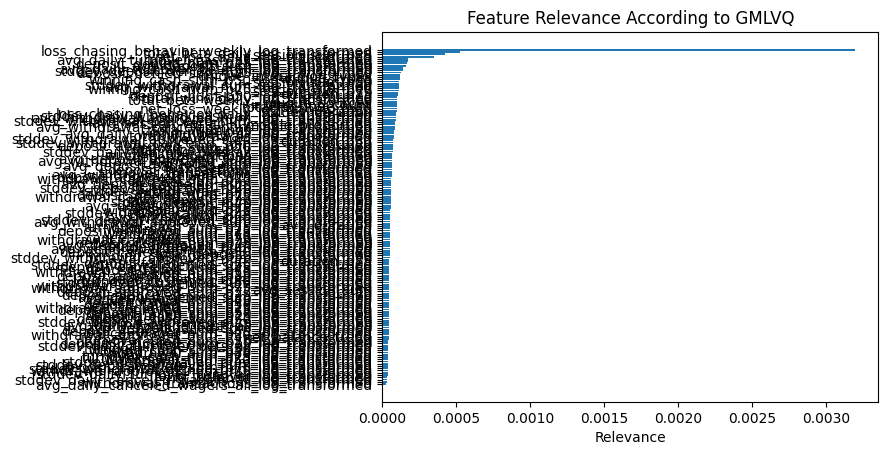

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklvq import GMLVQ
import matplotlib.pyplot as plt

# Assuming df_full is your DataFrame and 'merged_category' is your label column
label_mapping = {
    'low_risk': 0,
    'minimal_risk': 0,
    'medium_risk': 1,
    'high_risk': 1,
    'medium_high_risk': 1,
    'low_medium_risk': 1
}

# Apply the mapping to the label column
df_full['merged_category'] = df_full['category'].map(label_mapping)

# Drop specified columns, assuming non-numeric columns have already been handled or converted
X = df_full.drop(columns=['merged_category', 'customer_id', 'category', 'date','label_date','label_date_unix','label_date_numeric'])

# Convert categorical variables to dummy variables if there are any
X = pd.get_dummies(X, drop_first=True)

# Ensure that y is correctly defined
y = df_full['merged_category'].values

# Verify the data types of features
print("Data types in X:")
print(X.dtypes)

# Convert DataFrame to NumPy array
X = X.values

# Ensure that X is a 2D array and y is a 1D array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the GMLVQ model
gmlvq = GMLVQ(distance_type="adaptive-squared-euclidean",
              activation_type="swish",
              activation_params={"beta": 2},
              solver_type="waypoint-gradient-descent",
              solver_params={"max_runs": 100, "k": 3, "step_size": np.array([0.1, 0.05])},
              random_state=1428)
gmlvq.fit(X_train_scaled, y_train)

# Extract the relevance matrix
relevance_matrix = gmlvq.lambda_

# Compute the relevance of each feature
feature_relevances = np.sum(relevance_matrix ** 2, axis=0)

# Get the features after one-hot encoding
features = X_train_scaled.shape[1]

# Create a DataFrame to display the feature importances if lengths match
if features == len(feature_relevances):
    # Ensure features align with the one-hot encoded data
    feature_importances = pd.DataFrame({'Feature': df_full.drop(columns=['merged_category', 'customer_id', 'category', 'date','label_date','label_date_unix','label_date_numeric']).columns, 'Relevance': feature_relevances})
    
    # Sort the features by their relevance
    feature_importances = feature_importances.sort_values(by='Relevance', ascending=False)
    
    # Display the most relevant features
    print(feature_importances)
    
    # Optionally, plot the feature importances
    plt.barh(feature_importances['Feature'], feature_importances['Relevance'])
    plt.xlabel('Relevance')
    plt.title('Feature Relevance According to GMLVQ')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Mismatch in the number of features and relevance scores.")


                                              Feature  Relevance
57       loss_chasing_behavior_weekly_log_transformed   0.003191
50                   total_bets_daily_log_transformed   0.000528
7                                     session_sum_p25   0.000425
54                     net_loss_daily_log_transformed   0.000346
18        avg_daily_turnover_cash_all_log_transformed   0.000176
..                                                ...        ...
140                    total_turnover_log_transformed   0.000035
148                       net_balance_log_transformed   0.000034
25   stddev_daily_canceled_wagers_all_log_transformed   0.000031
146           withdrawal_transactions_log_transformed   0.000030
20      avg_daily_canceled_wagers_all_log_transformed   0.000027

[149 rows x 2 columns]


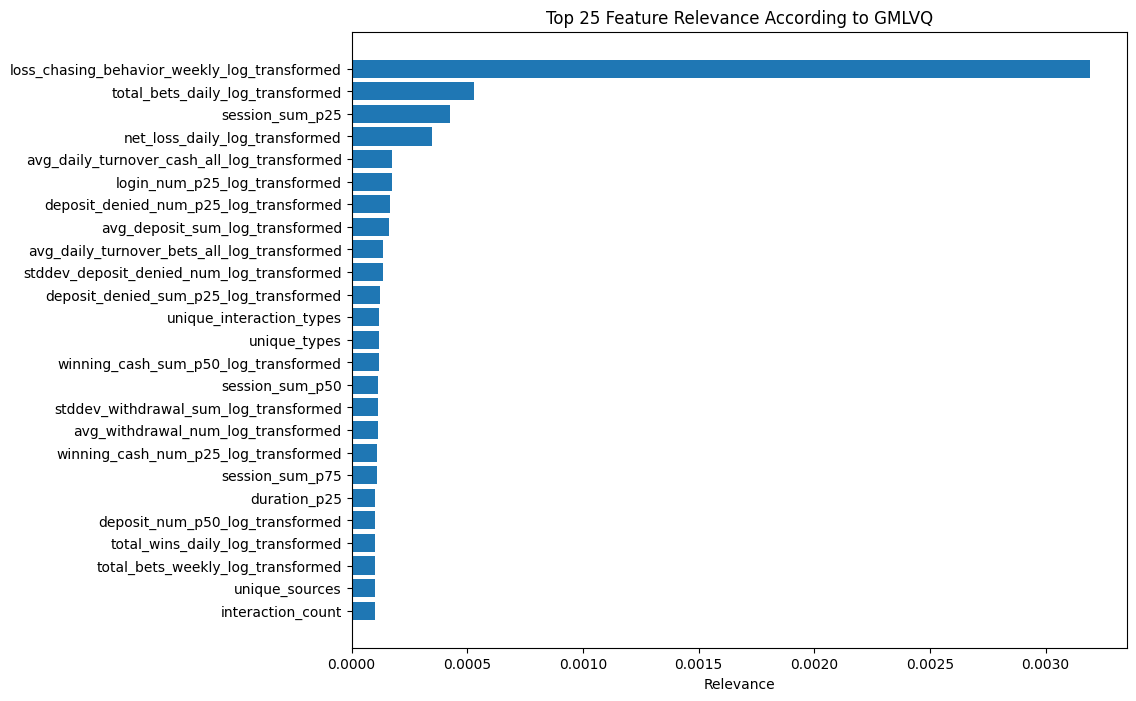

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'features' holds the actual feature names, not just the number of features
features = df_full.drop(columns=['merged_category', 'customer_id', 'category', 'date', 'label_date', 'label_date_unix', 'label_date_numeric']).columns

# Create a DataFrame to display the feature importances if lengths match
if len(features) == len(feature_relevances):
    feature_importances = pd.DataFrame({'Feature': features, 'Relevance': feature_relevances})
    
    # Sort the features by their relevance
    feature_importances = feature_importances.sort_values(by='Relevance', ascending=False)
    
    # Display the most relevant features
    print(feature_importances)

    # Select the top N features for better visualization
    N = 25  # Adjust this number as needed
    top_features = feature_importances.head(N)
    
    # Optionally, plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['Feature'], top_features['Relevance'])
    plt.xlabel('Relevance')
    plt.title(f'Top {N} Feature Relevance According to GMLVQ')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Mismatch in the number of features and relevance scores.")


[15:01:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Number of features in model: 149
Number of feature names provided: 149
                                         Feature  Importance
57                net_loss_daily_log_transformed    0.659657
7                                session_sum_p25    0.251221
51                 login_num_p50_log_transformed    0.223264
55              total_wins_daily_log_transformed    0.186254
50                 login_num_p25_log_transformed    0.150535
56             total_wins_weekly_log_transformed    0.131699
54             total_bets_weekly_log_transformed    0.115610
52                 login_num_p75_log_transformed    0.102977
53              total_bets_daily_log_transformed    0.096455
2                              mobile_proportion    0.092029
85   avg_withdrawal_approved_num_log_transformed    0.090013
65      avg_deposit_approved_num_log_transformed    0.088640
5                                   duration_p50    0.083581
4                                   duration_p25    0.079609
61            

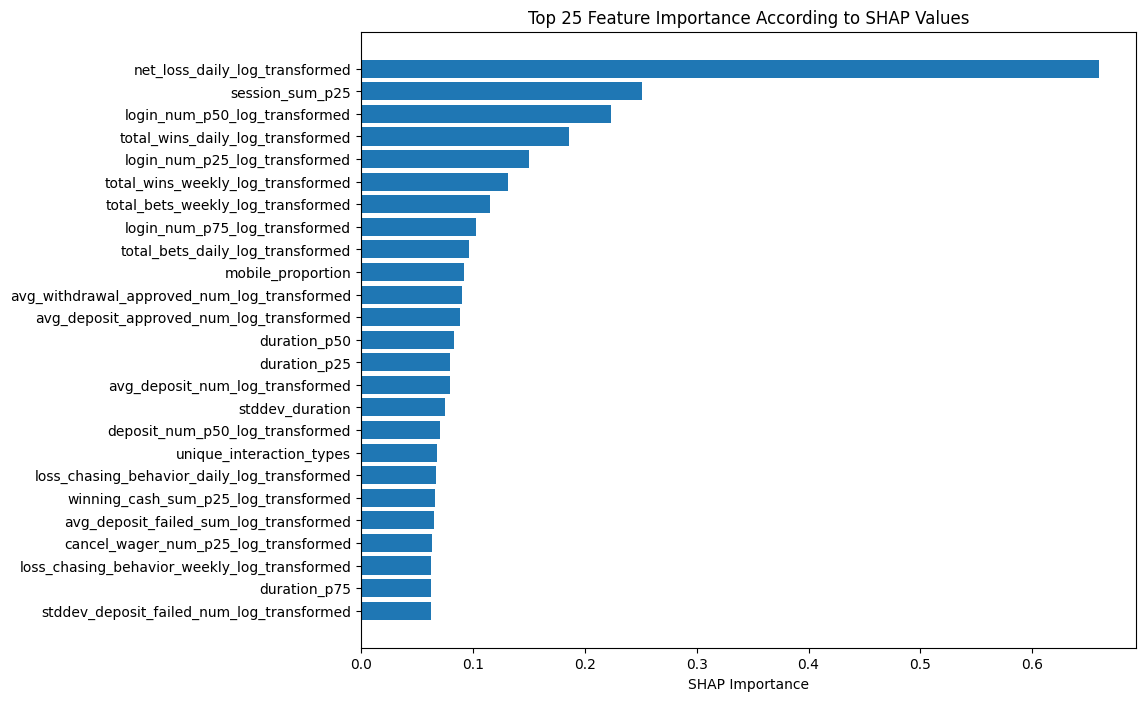

In [42]:
import xgboost as xgb
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Compute SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train_scaled)

# Get mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Verify the length of the SHAP values and the feature names
print(f"Number of features in model: {len(shap_importance)}")
print(f"Number of feature names provided: {len(X_train_scaled[0])}")

# Adjust feature names to match the actual number of features used
feature_names = df_full.drop(columns=['merged_category', 'customer_id', 'category', 'date']).columns
if len(feature_names) != len(shap_importance):
    feature_names = feature_names[:len(shap_importance)]  # Adjust to match the actual features used by the model

# Create a DataFrame to display the feature importances
shap_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': shap_importance})

# Sort the features by their importance
shap_importances_df = shap_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 25 features
top_25_features = shap_importances_df.head(25)
print(top_25_features)

# Optionally, plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_25_features['Feature'], top_25_features['Importance'])
plt.xlabel('SHAP Importance')
plt.title('Top 25 Feature Importance According to SHAP Values')
plt.gca().invert_yaxis()
plt.show()


In [43]:
# Assuming top_25_features and top_features are DataFrames
# containing the 'Feature' column with feature names

# Extract feature names from both DataFrames
top_25_feature_names = set(top_25_features['Feature'])
top_feature_names = set(top_features['Feature'])

# Take the union of the two sets to get all unique feature names
final_feature_names = list(top_25_feature_names.union(top_feature_names))

# Display the final list of features
print("Final list of features (union of top_25_features and top_features):")
print(final_feature_names)


Final list of features (union of top_25_features and top_features):
['deposit_denied_sum_p25_log_transformed', 'avg_withdrawal_approved_num_log_transformed', 'winning_cash_sum_p50_log_transformed', 'avg_deposit_approved_num_log_transformed', 'unique_sources', 'avg_deposit_failed_sum_log_transformed', 'avg_daily_turnover_bets_all_log_transformed', 'avg_daily_turnover_cash_all_log_transformed', 'login_num_p75_log_transformed', 'loss_chasing_behavior_daily_log_transformed', 'net_loss_daily_log_transformed', 'session_sum_p50', 'stddev_deposit_denied_num_log_transformed', 'duration_p25', 'login_num_p25_log_transformed', 'deposit_denied_num_p25_log_transformed', 'duration_p75', 'avg_withdrawal_num_log_transformed', 'duration_p50', 'total_bets_weekly_log_transformed', 'unique_types', 'session_sum_p25', 'avg_deposit_sum_log_transformed', 'stddev_duration', 'total_wins_daily_log_transformed', 'stddev_withdrawal_sum_log_transformed', 'unique_interaction_types', 'winning_cash_num_p25_log_transfor

In [44]:
final_feature_names.append('category')
final_feature_names.append('net_balance_trend')
final_feature_names.append('net_balance_log_transformed')
final_feature_names.append('unique_types')
final_feature_names.append('interaction_count')
final_feature_names.append('total_positive_num')
final_feature_names.append('max_deposit_log_transformed')
final_feature_names.append('unique_interaction_types')
final_feature_names.append('unique_sources')

In [45]:
df_full[final_feature_names]

deposit_denied_sum_p25_log_transformed  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
23412                                     0.0   
23413                                     0.0   
23414                                     0.0   
23415                                     0.0   
23416                                     0.0   

       avg_withdrawal_approved_num_log_transformed  \
0                                         0.371564   
1                                         0.059277   
2                                         0.086461   
3                                         0.121934   
4                                         0.100339   
...                                            ...   
23412                                     0.496437   
23413                                     0.121934   
23414                                     0.256855   
23415                                     0.000000   
23416                                     0.121934   

       winning_cash_sum_p50_log_transformed  \
0                                  0.858662   
1                                  6.634653   
2                                  4.660179   
3                                  4.703204   
4                                  7.448864   
...                                     ...   
23412                              5.374676   
23413                              4.703204   
23414                              4.703204   
23415                              6.455277   
23416                              4.703204   

       avg_deposit_approved_num_log_transformed  unique_sources  \
0                                      0.438255             9.0   
1                                      0.908628             9.0   
2                                      0.857317             9.0   
3                                      0.693147             1.0   
4                                      0.795103             9.0   
...                                         ...             ...   
23412                                  0.579818             9.0   
23413                                  0.693147             9.0   
23414                                  0.567746             9.0   
23415                                  0.693147             1.0   
23416                                  0.693147             9.0   

       avg_deposit_failed_sum_log_transformed  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
23412                                     0.0   
23413                                     0.0   
23414                                     0.0   
23415                                     0.0   
23416                                     0.0   

       avg_daily_turnover_bets_all_log_transformed  \
0                                         3.044522   
1                                         7.810993   
2                                         6.418563   
3                                         6.652863   
4                                         9.480902   
...                                            ...   
23412                                     7.826443   
23413                                     6.652863   
23414                                     6.652863   
23415                                     9.075017   
23416                                     6.652863   

       avg_daily_turnover_cash_all_log_transformed  \
0                                         1.922788   
1                                         9.965520   

In [46]:
df_full[final_feature_names].columns

Index(['deposit_denied_sum_p25_log_transformed',
       'avg_withdrawal_approved_num_log_transformed',
       'winning_cash_sum_p50_log_transformed',
       'avg_deposit_approved_num_log_transformed', 'unique_sources',
       'avg_deposit_failed_sum_log_transformed',
       'avg_daily_turnover_bets_all_log_transformed',
       'avg_daily_turnover_cash_all_log_transformed',
       'login_num_p75_log_transformed',
       'loss_chasing_behavior_daily_log_transformed',
       'net_loss_daily_log_transformed', 'session_sum_p50',
       'stddev_deposit_denied_num_log_transformed', 'duration_p25',
       'login_num_p25_log_transformed',
       'deposit_denied_num_p25_log_transformed', 'duration_p75',
       'avg_withdrawal_num_log_transformed', 'duration_p50',
       'total_bets_weekly_log_transformed', 'unique_types', 'session_sum_p25',
       'avg_deposit_sum_log_transformed', 'stddev_duration',
       'total_wins_daily_log_transformed',
       'stddev_withdrawal_sum_log_transformed', 'uniq